#### Chapter 33
### Analyzing Neural Time Series Data
Python code for Chapter 33 -- converted from original Matlab by AE Studio (and ChatGPT)\
Original Matlab code by Mike X Cohen

This code accompanies the book, titled "Analyzing Neural Time Series Data" (MIT Press).\
Using the code without following the book may lead to confusion, incorrect data analyses, and misinterpretations of results.\
Mike X Cohen and AE Studio assume no responsibility for inappropriate or incorrect use of this code.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from skimage.measure import label as sk_label, regionprops
from scipy.signal import convolve2d
from statsmodels.stats.multitest import multipletests

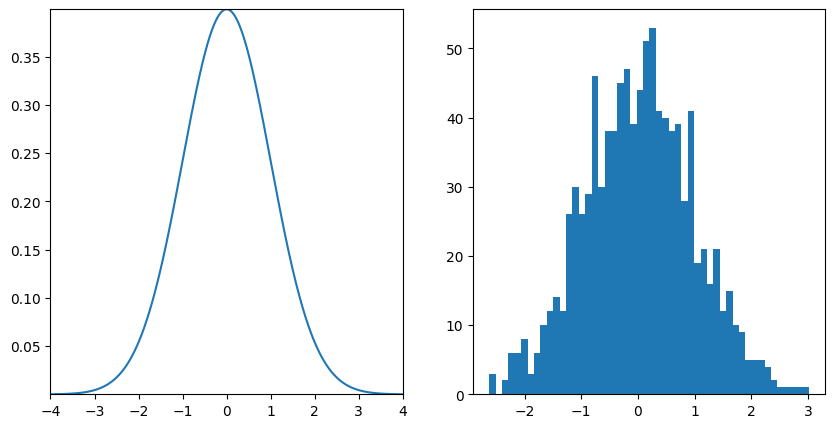

p_n = 0.022
p_z = 0.02275


In [7]:
# Figure 33.1

plt.figure(figsize=(10, 5))

# Subplot 1
plt.subplot(121)
x = np.linspace(-4, 4, 8000)
plt.plot(x, norm.pdf(x))
plt.gca().autoscale(enable=True, axis='both', tight=True)

# Subplot 2
plt.subplot(122)
a = np.random.randn(1000)
plt.hist(a, 50)
plt.show()

# Display probabilities
print(f"p_n = {np.sum(a > 2) / 1000}")
print(f"p_z = {1 - norm.cdf(2):.5f}")

In [8]:
# Figure 33.5/6

# These figures are generated in the code for chapter 34

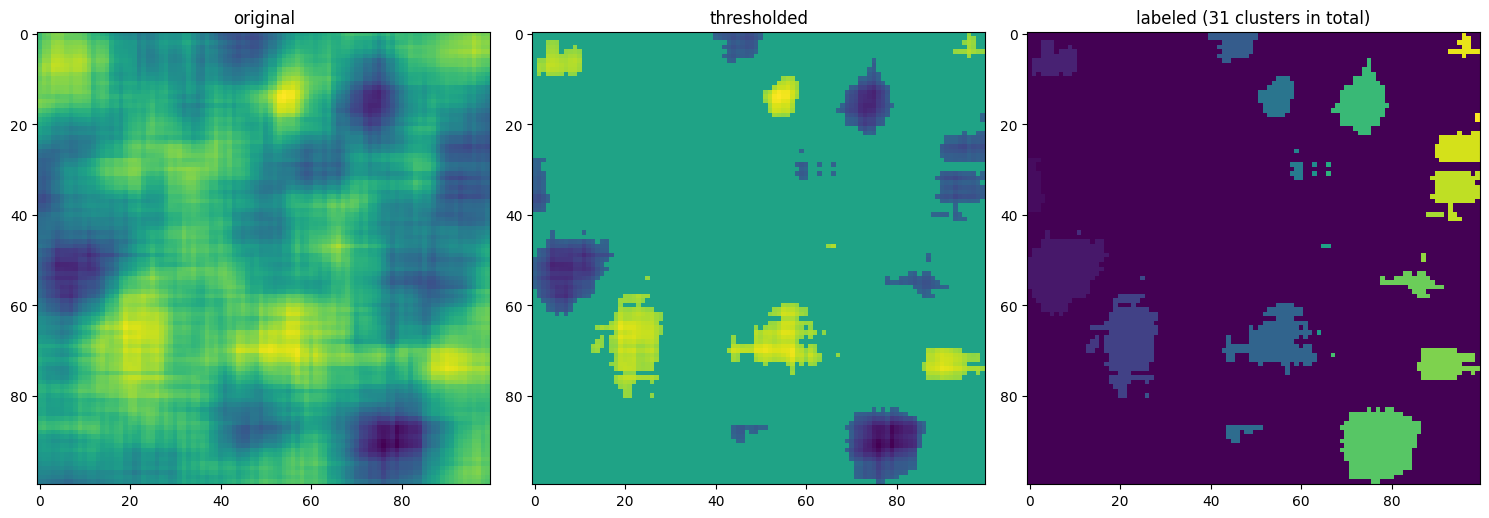

In [50]:
# Figure 33.8

# Create 2D smoothing kernel
xi, yi = np.meshgrid(np.arange(-10, 11), np.arange(-10, 11))
zi = xi**2 + yi**2
zi = 1 - (zi / np.max(zi))

# Create a random smoothed map
map = convolve2d(np.random.randn(100, 100), zi, mode='same')

# Threshold map at an arbitrary value
mapt = map.copy()
mapt[np.abs(map) < np.ptp(map) / 4] = 0

# Need a binary map for sk_label
mapt1 = mapt.copy()
mapt1[mapt1 != 0] = 1

# Get labeled map via sk_label
mapl, nblobs = sk_label(mapt1, return_num=True, connectivity=2)

# Extract information from clusters
clustcount = np.zeros(nblobs)
clustsum = np.zeros(nblobs)
for i in range(nblobs):
    clustcount[i] = np.sum(mapl == i + 1)
    clustsum[i] = np.sum(map[mapl == i + 1])

# Regionprops works slightly differently but will give similar information
blobinfo = regionprops(mapl)
clustcount = np.zeros(nblobs)
clustsum = np.zeros(nblobs)
for i, blob in enumerate(blobinfo):
    clustcount[i] = blob.area
    clustsum[i] = np.sum(map[blob.coords[:, 0], blob.coords[:, 1]])

# Cluster count can be done faster using list comprehension
clustercount = [blob.area for blob in blobinfo]

# Plotting
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(map.T, cmap='viridis')
plt.title('original')

plt.subplot(132)
plt.imshow(mapt.T, cmap='viridis')
plt.title('thresholded')

plt.subplot(133)
plt.imshow(mapl.T, cmap='viridis')
plt.title(f'labeled ({nblobs} clusters in total)')

plt.tight_layout()
plt.show()

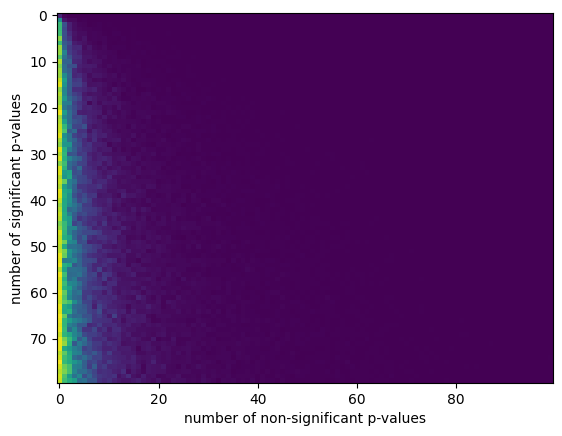

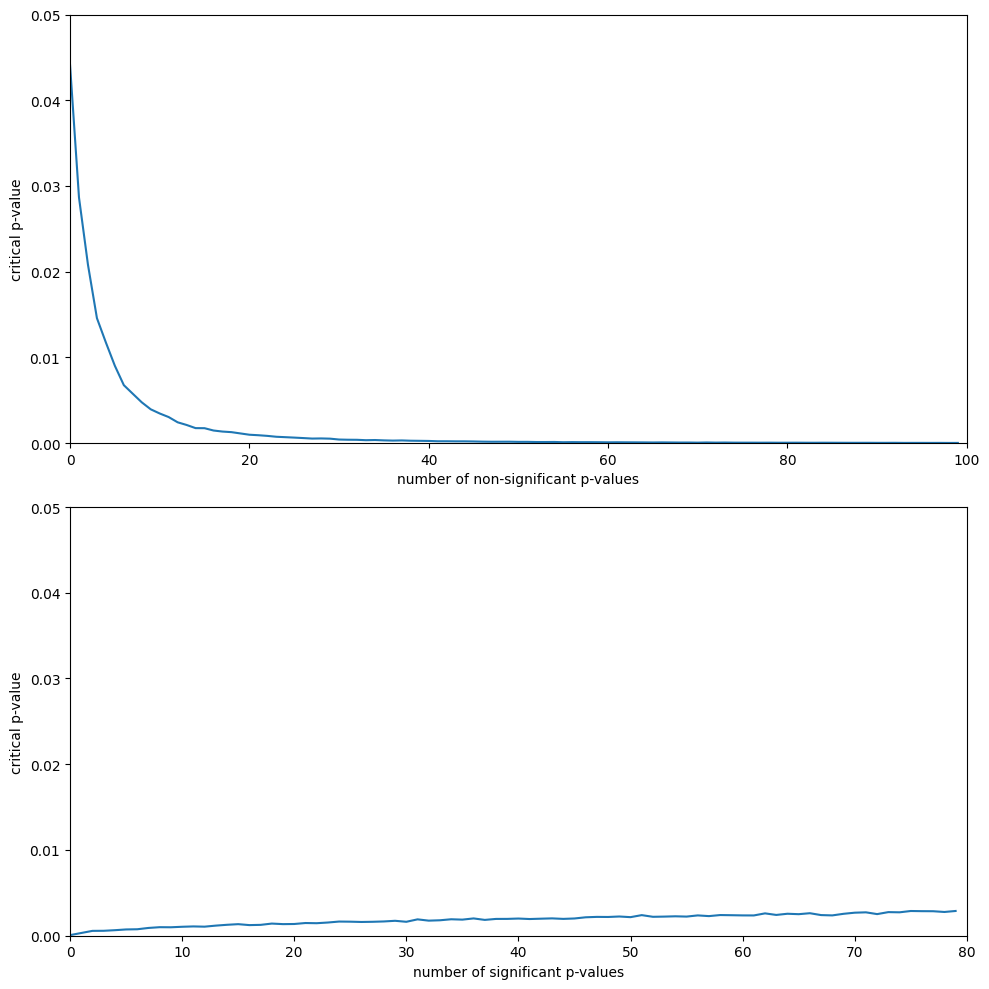

In [56]:
# Figure 33.10

nsigs = np.round(np.linspace(1, 500, 80)).astype(int)
nnons = np.round(np.linspace(1, 500, 100)).astype(int)

fdrpvals = np.zeros((20, len(nsigs), len(nnons)))

for iteri in range(20):
    for i, nsig in enumerate(nsigs):
        for j, nnonsig in enumerate(nnons):
            pvals = np.concatenate((np.random.rand(nsig) * 0.05, np.random.rand(nnonsig) * 0.5 + 0.05))
            reject, pvals_corrected, _, _ = multipletests(pvals, alpha=0.05, method='fdr_bh')
            fdr_threshold = np.max(pvals[reject]) if np.any(reject) else np.nan
            fdrpvals[iteri, i, j] = fdr_threshold

fdrpvals = np.nan_to_num(fdrpvals)
fdrpvals = np.nanmean(fdrpvals, axis=0)

plt.figure()
plt.imshow(fdrpvals, aspect='auto')
plt.clim(0, 0.05)
plt.xlabel('number of non-significant p-values')
plt.ylabel('number of significant p-values')
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.plot(np.nanmean(fdrpvals, axis=0))
plt.xlabel('number of non-significant p-values')
plt.ylabel('critical p-value')
plt.xlim(0, 100)
plt.ylim(0, 0.05)

plt.subplot(212)
plt.plot(np.nanmean(fdrpvals, axis=1))
plt.xlabel('number of significant p-values')
plt.ylabel('critical p-value')
plt.xlim(0, 80)
plt.ylim(0, 0.05)

plt.tight_layout()
plt.show()